# Figure 2 - Layout

In [7]:
import sys
sys.path.append("..")

from main import *
from visualization import *

from scipy.optimize import curve_fit

# Loading data for Figure 2

In [9]:
N_values = np.linspace(500, 5000, 10, endpoint=True)
scores_per_N = np.load('../Results/scores_per_N.npy')

h_values = np.linspace(0.025, 1, 50)
scores_per_h = np.load('../Results/scores_per_h_2500.npy')
scores_per_h_2 = np.load('../Results/scores_per_h_5000.npy')

def model(x, a, b, c):
    return (a / (x ** b)) + c

cutoff = 6
x = h_values[cutoff:]
y = np.mean(scores_per_h, axis=1)[cutoff:]
initial_guess = [1, 2, 0]
params, _ = curve_fit(model, x, y, p0=initial_guess, maxfev=5000)

exponential_fit_params = np.load('../Results/exponents_distribution.npy')
exponents = exponential_fit_params[:, 1]

D_mean = np.load('../ComputeCanada/edge_swapping/avg_d_per_rho_swaps.npy')
mode_similarities = np.load('../ComputeCanada/edge_swapping/mode_correlations_per_rho_swaps.npy')

fractions = np.linspace(0, 0.99, 36, endpoint=True)

scores = np.zeros((mode_similarities.shape[0], mode_similarities.shape[1]))
for i in range(mode_similarities.shape[0]):
    for j in range(mode_similarities.shape[1]):
        scores[i, j] = np.mean(np.abs(np.diag(mode_similarities[i, j])))

avg_distance = np.load('../Results/figure2_avg_distance.npy')

# Rendering Figure 2

In [10]:
red = [1, 0, 0]
blue = np.array([66, 135, 245]) / 255

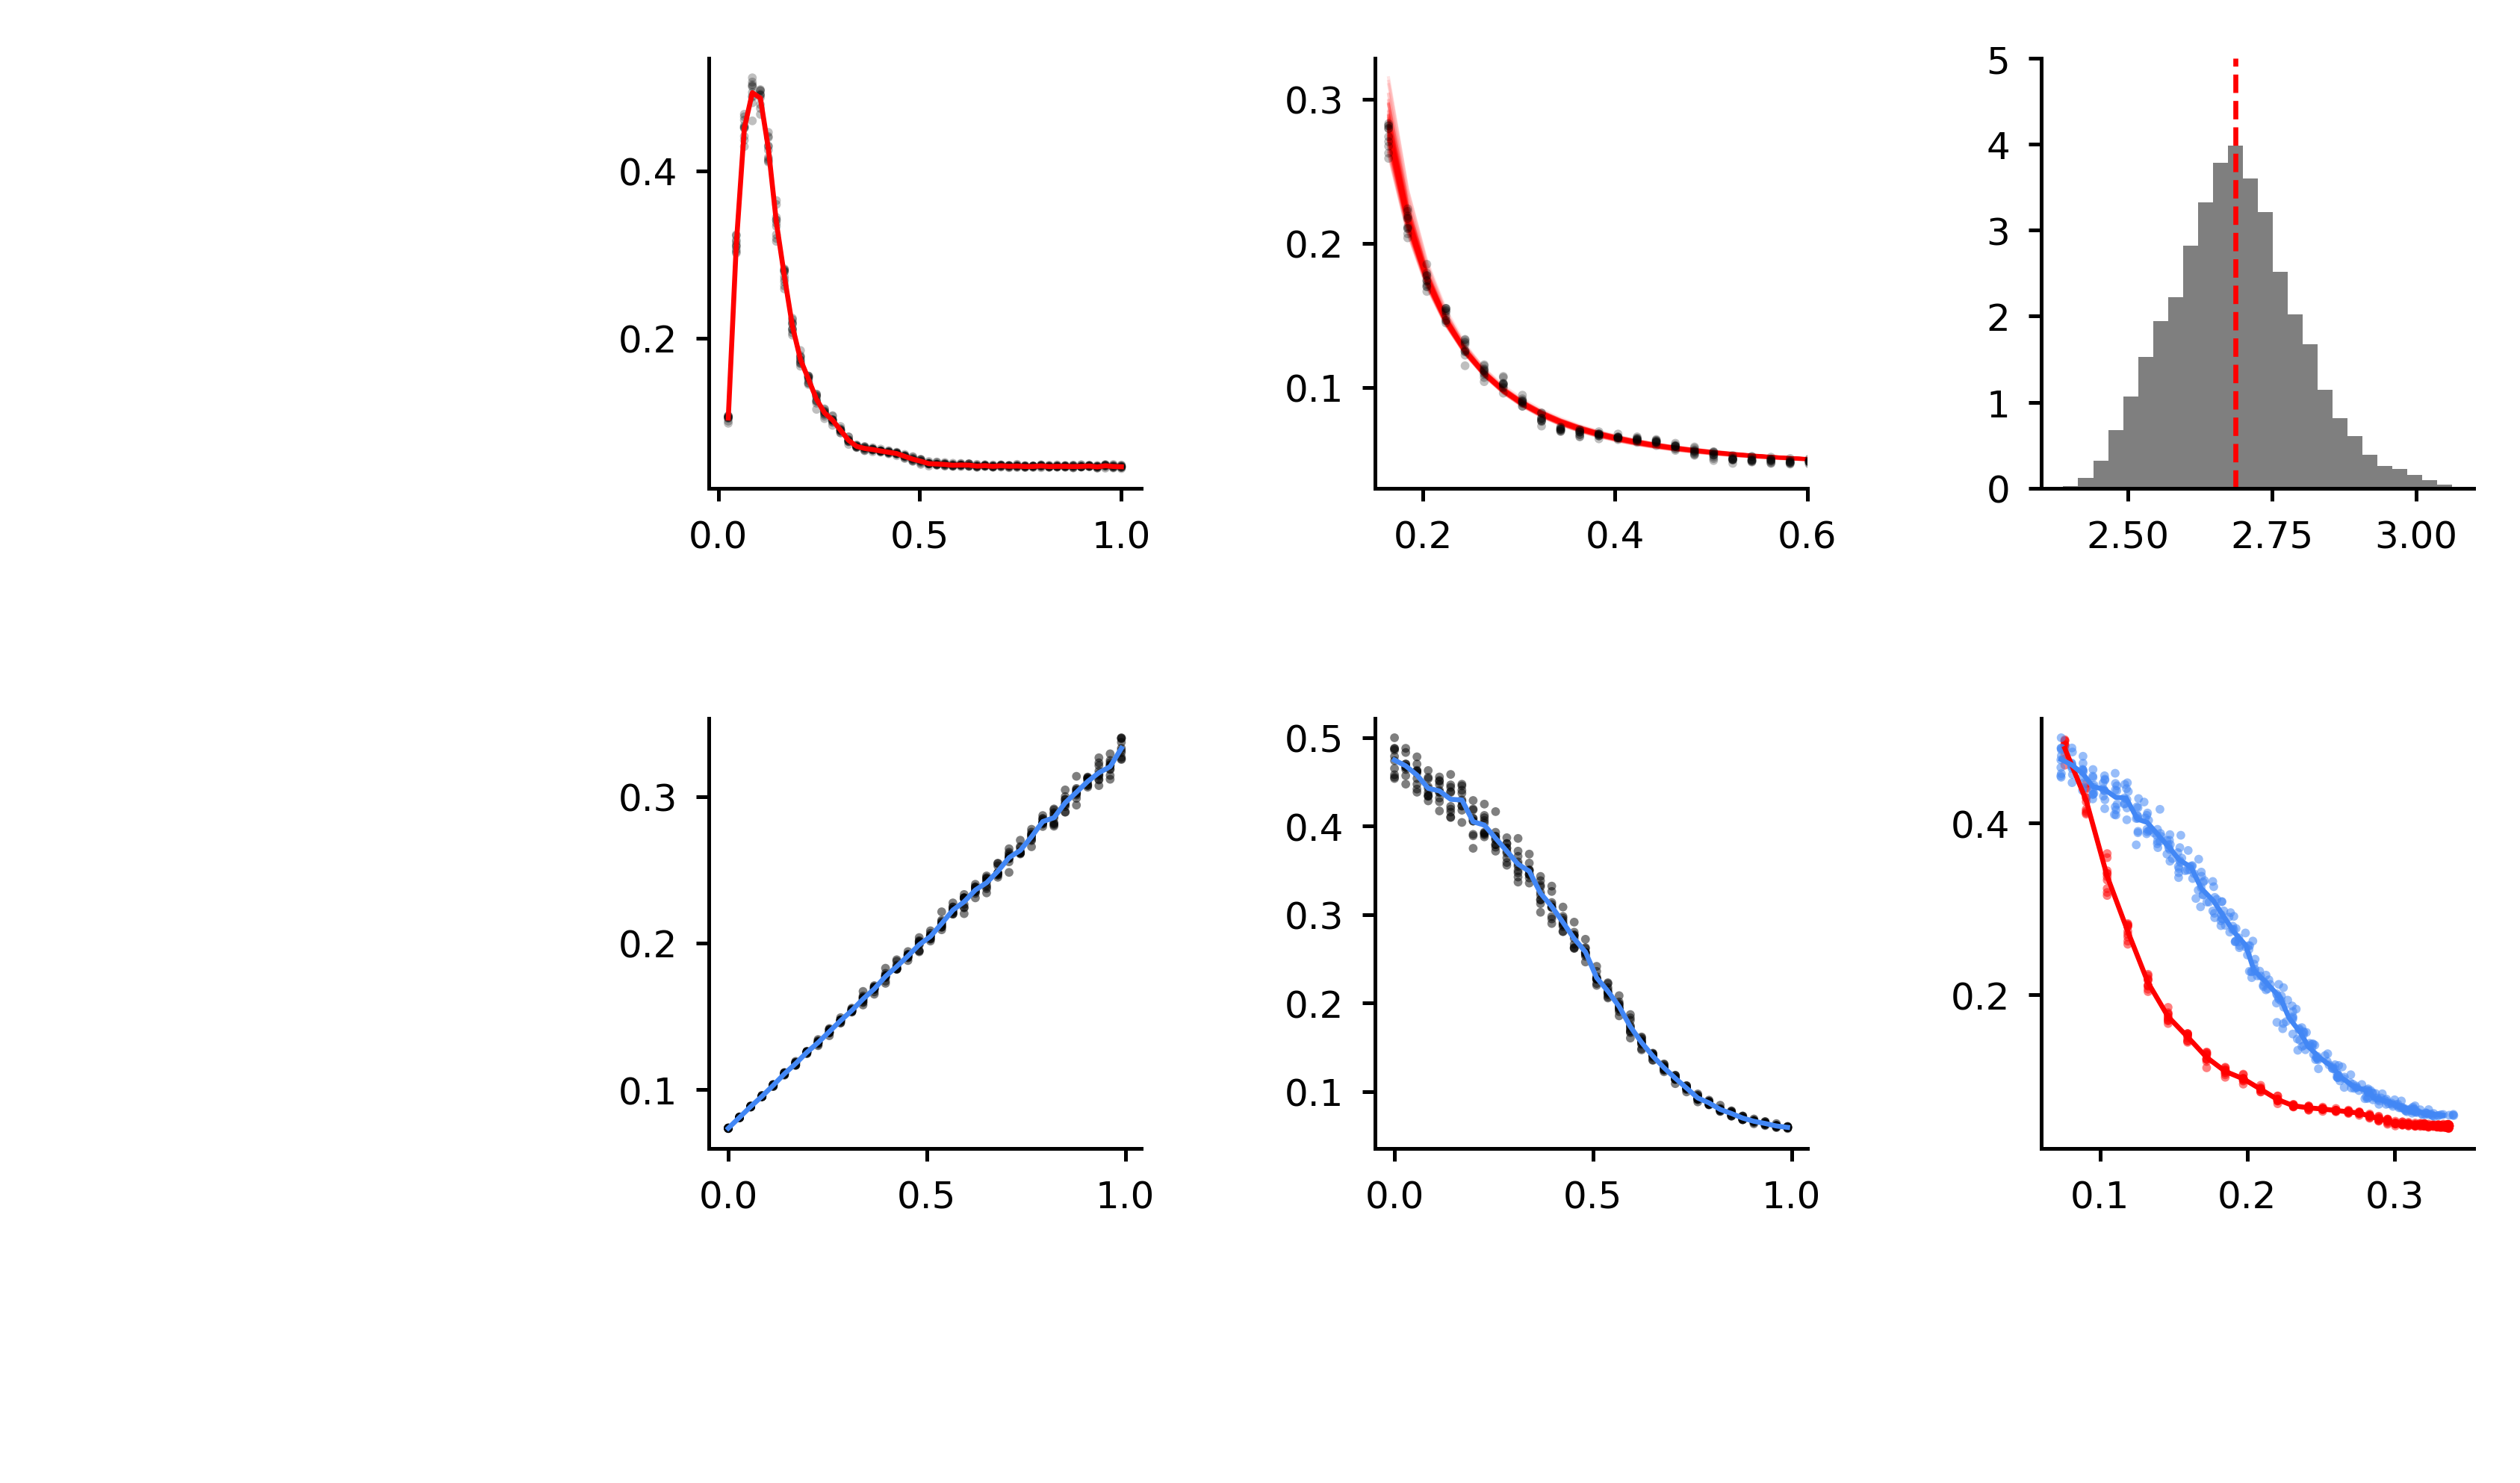

In [26]:
fig = PaperFigure(figsize=(7, 4))

fig.set_tick_length(2)
fig.set_font_size(6)
fig.add_background()

# Setting up axes -------------------------------------------------------------------------------

w = 1.25
h = w
pad = (7 - 4 * w) / 3
fig.add_axes('h_scaling', (w + pad, 0), w, h)
fig.add_axes('curve_fit', (2 * (w + pad), 0), w, h)
fig.add_axes('exponents', (3 * (w + pad), 0), w, h)

fig.add_axes('swaps_vs_d', (1 * (w + pad), w + pad), w, h)
fig.add_axes('swaps_vs_r', (2 * (w + pad), w + pad), w, h)
fig.add_axes('comparison', (3 * (w + pad), w + pad), w, h)

fig.set_line_thickness(0.6)

# Filling axes ----------------------------------------------------------------------------------

ax = fig.axes['h_scaling']
ax.plot(h_values, np.mean(scores_per_h, axis=1), color=red, linewidth=0.8)
for i in range(scores_per_h.shape[1]):
    ax.scatter(h_values, scores_per_h[:, i], color='black', s=2, edgecolor='None', alpha=0.25, zorder=-10)
ax.spines[['top', 'right']].set_visible(False)
#ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])

# Old version
#ax = fig.axes['curve_fit']
#for i in range(10):
#    ax.scatter(x, y, color='black', alpha=0.5, s=0.75)
#ax.plot(x, model(x, params[0], params[1], params[2]), color=red, alpha=1, linewidth=0.8)
#ax.spines[['top', 'right']].set_visible(False)

ax = fig.axes['curve_fit']
fit_cutoff = 7
for i in range(scores_per_h.shape[1]):
    ax.scatter(h_values[fit_cutoff:], scores_per_h[fit_cutoff:, i], color='black', s=2, alpha=0.25, edgecolor='None')
x = h_values[fit_cutoff:]
for p in exponential_fit_params[:50]:
    ax.plot(x, model(x, p[0], p[1], p[2]), color='red', alpha=0.1, linewidth=0.5, zorder=-10)
for p in exponential_fit_params[-50:]:
    ax.plot(x, model(x, p[0], p[1], p[2]), color='red', alpha=0.1, linewidth=0.5, zorder=-10)
ax.set_xlim([0.15, 0.6])
ax.spines[['top', 'right']].set_visible(False)

ax = fig.axes['exponents']
ax.hist(exponents, bins=30, color='black', alpha=0.5, density=True)
ax.axvline(np.mean(exponents), color=red, linewidth=0.8, linestyle='--')
ax.set_xlim([2.35, 3.1])
ax.set_ylim([0, 5])
ax.spines[['top', 'right']].set_visible(False)

ax = fig.axes['swaps_vs_d']
ax.plot(fractions, np.mean(D_mean, axis=1), color=blue, linewidth=0.8)
for i in range(D_mean.shape[1]):
    ax.scatter(fractions, D_mean[:, i], color='black', alpha=0.5, s=2, edgecolor='None')
ax.spines[['top', 'right']].set_visible(False)
#plt.xlim([0, 0.25])

ax = fig.axes['swaps_vs_r']
ax.plot(fractions, np.mean(scores, axis=1), color=blue, linewidth=0.8)
for i in range(scores.shape[1]):
    ax.scatter(fractions, scores[:, i], color='black', s=2, alpha=0.5, edgecolor='None')
ax.spines[['top', 'right']].set_visible(False)
#plt.xlim([0, 0.25])

ax = fig.axes['comparison']
for i in range(scores_per_h.shape[1]):
    ax.scatter(avg_distance[4:], scores_per_h[4:, i], color=red, alpha=0.5, edgecolor='None', s=2)
ax.plot(avg_distance[4:], np.mean(scores_per_h, axis=1)[4:], color=red, linewidth=0.8)
for i in range(scores.shape[1]):
    ax.scatter(D_mean[:, i], scores[:, i], color=blue, alpha=0.55, edgecolor='None', s=2)
ax.plot(np.mean(D_mean, axis=1), np.mean(scores, axis=1), color=blue, linewidth=0.8)


ax.spines[['top', 'right']].set_visible(False)
#plt.xlim([0.11, 0.34])

fig.show()

In [27]:
fig.save('../Figures/figure2_incomplete.svg')

# Manually annotated parameters

Curve fit exponent:

In [52]:
params[1]

2.430752316441541

Distribution mean and std

In [28]:
np.mean(exponents)

2.686562534041973

In [29]:
np.std(exponents)

0.10908297727997478